 #                                        Linear Regression

The task aimed to create simple linear regression models and a multivariate linear regression model using a housing dataset. The dataset contained 6 variables (PRICE, HEIGHT, WIDTH, SIGNED, PICTURE, HOUSE) and 431 observations.
In the simple linear regression model, two main variables were used for the first model. That is, ‘PRICE’ and ‘WIDTH’ of the house. In the Second model, ‘PRICE’ and ‘SIZE’ were used. The size was established by multiplying the ‘HEIGHT’ and the ‘WIDTH’ variables. 
For the multivariate regression model, ‘PRICE’ was used as the dependent variable and the rest variables were used as independent variables.

In [2]:
#importing packages and modules
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#Importing data
monet = pd.read_csv('D:\\Python\\Datafolder\\monet data\\monet.csv')

In [3]:
monet.head()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
0,3.993780,21.3,25.6,1,1,1
1,8.800000,31.9,25.6,1,2,2
2,0.131694,6.9,15.9,0,3,3
3,2.037500,25.7,32.0,1,4,2
4,1.487500,25.7,32.0,1,4,2


In [4]:
#Checking data types
monet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PRICE    430 non-null    float64
 1   HEIGHT   430 non-null    float64
 2   WIDTH    430 non-null    float64
 3   SIGNED   430 non-null    int64  
 4   PICTURE  430 non-null    int64  
 5   HOUSE    430 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 20.3 KB


<AxesSubplot:>

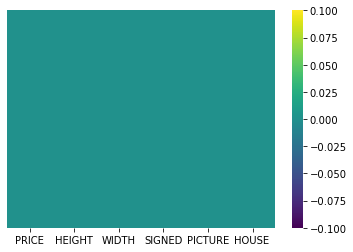

In [5]:
#Checking if there missing values using a heatmap
sns.heatmap(monet.isnull(), yticklabels=False, cmap='viridis')

## Training and Testing the Data

### First Model

In [6]:
# Dividing data into independent and dependent variables (X, y)
X1 = monet['WIDTH']
y1 = monet['PRICE']


In [7]:
#Changing data in dataframe variables
X1=pd.DataFrame(monet['WIDTH'])
y1=pd.DataFrame(monet['PRICE'])

In [8]:
X1.head(3)

,WIDTH
0,25.6
1,25.6
2,15.9


In [9]:
y1.head(3)

,PRICE
0,3.993780
1,8.800000
2,0.131694


In [10]:
# splitting it into training and testing data 
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split (X1, y1, test_size=0.3, random_state=1)

In [11]:
#Importing the Linear regression algorithm
from sklearn.linear_model import LinearRegression

lir1model = LinearRegression()

In [12]:
# Trianing the model
TrainedModel1 = lir1model.fit(X1_train, y1_train)

In [13]:
# Using the model to predict
predictions1 = TrainedModel1.predict(X1_test)

In [14]:
TrainedModel1.intercept_

array([-1.67749373])

In [15]:
TrainedModel1.coef_

array([[0.14250483]])

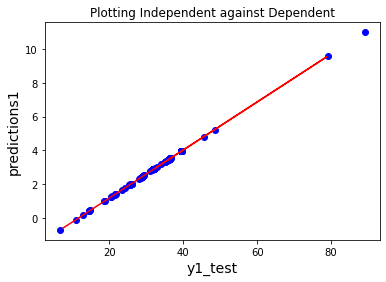

In [16]:
#Making a scatterplot 
plt.scatter(X1_test, predictions1, color='blue')
plt.plot(X1_train, -1.6775 + 0.1425*X1_train, 'r')
plt.title('Plotting Independent against Dependent')
plt.xlabel('y1_test', fontsize=14)
plt.ylabel('predictions1', fontsize=14)
plt.show()


### Checking for the error of prediction

In [17]:
#Checking for the error of prediction
from sklearn.metrics import mean_squared_error

mean_squared_error(y1_test, predictions1)

22.85283404769865

## Second Model

In [18]:
# Combining two variables(height and width)to form size by multiplication,concatenating dataframes,and dropping height and width
SIZE = monet['HEIGHT']*monet['WIDTH']
monet1 = pd.concat([monet, SIZE], axis=1, join='outer')
monet1 = monet1.rename(columns = {0:'SIZE'})
monet1 = monet1.drop(['HEIGHT','WIDTH'], axis=1)

In [19]:
# Dividing data into independent and dependent variables (X, y)
X2 = monet1['SIZE']
y2 = monet1['PRICE']


In [20]:
#Changing data in dataframe variables
X2=pd.DataFrame(monet1['SIZE'])
y2=pd.DataFrame(monet1['PRICE'])

In [21]:
X2.head(3)


,SIZE
0,545.28
1,816.64
2,109.71


In [22]:
y2.head(3)

,PRICE
0,3.993780
1,8.800000
2,0.131694


In [23]:
# splitting it into training and testing data 
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split (X2, y2, test_size=0.3, random_state=1)

In [24]:
#Importing the Linear regression algorithm
from sklearn.linear_model import LinearRegression

lir2model = LinearRegression()

In [25]:
# Trianing the model
TrainedModel2 = lir2model.fit(X2_train, y2_train)

In [26]:
# Using the model to predict
predictions2 = TrainedModel2.predict(X2_test)

In [27]:
#Checking the intercept
TrainedModel2.intercept_

array([0.85700011])

In [28]:
#Checking the Coefficient
TrainedModel2.coef_

array([[0.00218331]])

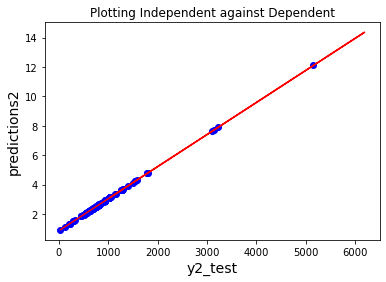

In [29]:
#Making a scatterplot 
plt.scatter(X2_test, predictions2, color='blue')
plt.plot(X2_train, 0.857 + 0.00218*X2_train, 'r')
plt.title('Plotting Independent against Dependent')
plt.xlabel('y2_test', fontsize=14)
plt.ylabel('predictions2', fontsize=14)
plt.show()


### Checking for the error of prediction

In [30]:
#Checking for the error of prediction
from sklearn.metrics import mean_squared_error

mean_squared_error(y2_test, predictions2)

22.892164988583005

## Multivariate linear regression model

In [31]:
# Dividing data into independent and dependent variables (X, y)
X = monet.drop('PRICE', axis=1)
y = monet['PRICE']

In [32]:
# splitting it into training and testing data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=1)

In [33]:
#Importing the Linear regression algorithm
from sklearn.linear_model import LinearRegression

limodel = LinearRegression()

In [34]:
# Trianing the model
TrainedModel = limodel.fit(X_train, y_train)

In [35]:
# Using the model to predict
predictions = TrainedModel.predict(X_test)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


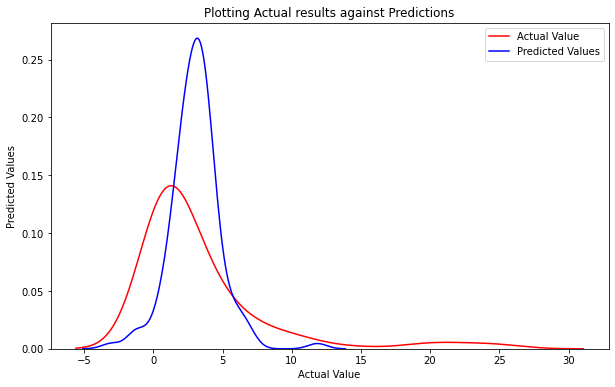

In [36]:
# Plotting training results against predictions
plt.figure(figsize=(10, 6))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(predictions, hist=False, color="b", label="Predicted Values" , ax=ax1)
plt.title('Plotting Actual results against Predictions')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Values')
plt.legend(loc="upper right")
plt.show()
plt.close()

### Checking for the error of prediction

In [37]:
#Checking for the error of prediction
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, predictions)


21.180552851146015

## The End